In [2]:
# import packages
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

# Part 1. 

In [3]:
# Load data from calcium_curves.xlsx
df = pd.read_excel("calcium_curves.xlsx", skiprows=1)
print(df)

       Intensity Mean  Unit Category  Channel    Image  Time    Set 1  \
0          817.684021   NaN     Spot        1  Image 1     1  Class B   
1          734.706970   NaN     Spot        1  Image 1     1  Class B   
2          769.390015   NaN     Spot        1  Image 1     1  Class B   
3          743.325012   NaN     Spot        1  Image 1     1  Class B   
4          753.684021   NaN     Spot        1  Image 1     1  Class B   
...               ...   ...      ...      ...      ...   ...      ...   
28935     1016.309998   NaN     Spot        1  Image 1   121  Class B   
28936      876.570984   NaN     Spot        1  Image 1   121  Class B   
28937     1064.250000   NaN     Spot        1  Image 1   121  Class B   
28938      832.604980   NaN     Spot        1  Image 1   121  Class B   
28939      722.547974   NaN     Spot        1  Image 1   121  Class B   

          TrackID      ID  
0      1000078592   78592  
1      1000078593   78593  
2      1000078596   78596  
3      1000

In [4]:
# Make a new table containing Intensity Mean, Time, TrackID
new_df = df.iloc[:, [0, 5, 7]] # iloc is used to select rows and columns by integer location.

In [5]:
print(new_df)

       Intensity Mean  Time     TrackID
0          817.684021     1  1000078592
1          734.706970     1  1000078593
2          769.390015     1  1000078596
3          743.325012     1  1000078605
4          753.684021     1  1000078612
...               ...   ...         ...
28935     1016.309998   121  1000094095
28936      876.570984   121  1000124400
28937     1064.250000   121  1000079324
28938      832.604980   121  1000119112
28939      722.547974   121  1000119113

[28940 rows x 3 columns]


In [6]:
# Rearrange the rows with the same TrackID
df_sorted = new_df.sort_values(by=["TrackID", "Time"])
df_sorted = df_sorted.reset_index(drop=True)

In [7]:
print(df_sorted)

       Intensity Mean  Time     TrackID
0          817.684021     1  1000078592
1          866.911987     2  1000078592
2          907.570007     3  1000078592
3          929.346985     4  1000078592
4          912.531982     5  1000078592
...               ...   ...         ...
28935      939.215027   117  1000153651
28936      965.674988   118  1000153651
28937      969.338013   119  1000153651
28938      921.359009   120  1000153651
28939      979.179993   121  1000153651

[28940 rows x 3 columns]


In [8]:
# How many different TrackID in the data? 
Track_ID = df["TrackID"].unique()

In [9]:
print(Track_ID)

[1000078592 1000078593 1000078596 1000078605 1000078612 1000078614
 1000078624 1000078626 1000078628 1000078630 1000078634 1000078635
 1000078646 1000078659 1000078664 1000078669 1000078674 1000078677
 1000078687 1000078688 1000078690 1000078692 1000078697 1000078699
 1000078707 1000078709 1000078711 1000078712 1000078719 1000078720
 1000078721 1000078722 1000078724 1000078725 1000078732 1000078737
 1000078740 1000078744 1000078747 1000078750 1000078754 1000078757
 1000078758 1000078759 1000078760 1000078762 1000078769 1000078770
 1000078772 1000078781 1000078789 1000078794 1000078795 1000078799
 1000078812 1000078814 1000078823 1000078829 1000078836 1000078838
 1000078840 1000078844 1000078845 1000078851 1000078856 1000078862
 1000078868 1000078869 1000078870 1000078876 1000078877 1000078881
 1000078894 1000078897 1000078900 1000078906 1000078907 1000078912
 1000078913 1000078920 1000078928 1000078929 1000078937 1000078940
 1000078943 1000078947 1000078948 1000078952 1000078954 100007

In [10]:
# total number of different trackID ?
Track_ID.shape[0]

522

Text(0.5, 1.0, 'Calcium Curve')

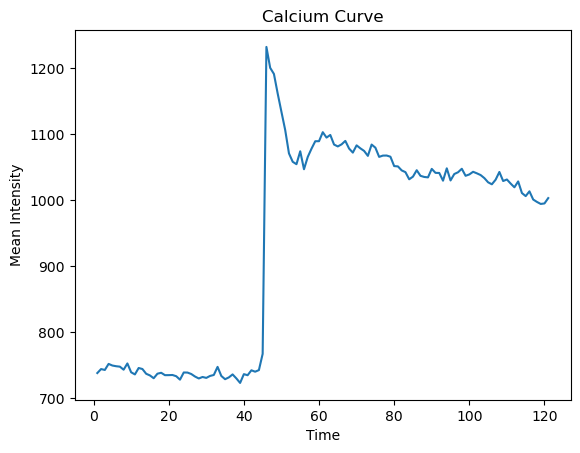

In [11]:
# Plot time Vs Mean Intensity for track ID 1000078624
ID_78624 = df_sorted[df_sorted["TrackID"] == 1000078624]
plt.plot(ID_78624["Time"], ID_78624["Intensity Mean"])
plt.xlabel("Time")
plt.ylabel("Mean Intensity")
plt.title("Calcium Curve")

# Part 2.

In [12]:
# For each TrackID, check if the data in "Time" is consecutive. 
# If not, fill the 'gaps' with mean values of the previous and next data points

# First, define a function to check for consecutive values in a column
def is_consecutive(column):
    # Check if the column values are consecutive
    return list(column) == list(range(min(column), max(column) + 1))

# Create a new DataFrame with colunm name "Intensity Mean", "Time", "TrackID"
df_consecutive = pd.DataFrame(columns=["Intensity Mean", "Time", "TrackID"])

# Next, use this function to check for each Track_ID if the corresponding "Time" is consecutive
for ID in Track_ID:
    df_Track = df_sorted[df_sorted["TrackID"] == ID]
    ti = df_Track["Time"]
    intensity = df_Track["Intensity Mean"]
    if is_consecutive(df_Track["Time"]) == False:
        # Fill the 'gaps' with mean values of the previous
        # 1. create a new time column with consecutive data
        ti_no_gap = np.r_[np.arange(min(df_Track["Time"]), max(df_Track["Time"]) + 1)]
        t0 = ti_no_gap - min(df_Track["Time"]) + 1
        intensity_no_gap = np.interp(ti_no_gap, ti, intensity)
    else:
        ti_no_gap = ti
        t0 = ti_no_gap - min(df_Track["Time"]) + 1
        intensity_no_gap = intensity
    tID = (ID - 10**9) * np.ones(
        t0.shape[0]
    )  # Note: here, we used ID-10**9 to make the ID shorter
    new_data = {"Intensity Mean": intensity_no_gap, "Time": t0, "TrackID": tID}
    # Append
    df1 = df_consecutive
    df2 = pd.DataFrame(new_data)
    df_consecutive = pd.concat([df1, df2])


In [13]:
df_consecutive

,Intensity Mean,Time,TrackID
0,817.684021,1,78592.0
1,866.911987,2,78592.0
2,907.570007,3,78592.0
3,929.346985,4,78592.0
4,912.531982,5,78592.0
...,...,...,...
28935,939.215027,3,153651.0
28936,965.674988,4,153651.0
28937,969.338013,5,153651.0
28938,921.359009,6,153651.0


# Part 3.

In [14]:
# Select TrackID that has more than 20 Time points and store them in a new DataFrame

# Create a new DataFrame with colunm name "Intensity Mean", "Time", "TrackID"
df_long_tracks = pd.DataFrame(columns=["Intensity Mean", "Time", "TrackID"])
df_short_tracks = pd.DataFrame(columns=["Intensity Mean", "Time", "TrackID"])
for ID in Track_ID:
    df_track2 = df_consecutive[df_consecutive["TrackID"] == (ID - 10**9)]
    tm = df_track2["Time"]
    if tm.size > 20:
        df_track3 = df_track2
        df_track4 = pd.DataFrame(columns=["Intensity Mean", "Time", "TrackID"])
    else:
        df_track4 = df_track2
        df_track3 = pd.DataFrame(columns=["Intensity Mean", "Time", "TrackID"])
    # Append
    df3 = df_long_tracks
    df_long_tracks = pd.concat([df3, df_track3])
    df4 = df_short_tracks
    df_short_tracks = pd.concat([df4, df_track4])

In [15]:
# Smooth the ‘Intensity Mean’ curve. We can do this by calculating the moving mean of ‘Intensity Mean’.

moving_average_window_size = 5
df_full = pd.DataFrame(
    columns=[
        "Intensity Mean",
        "Time",
        "TrackID",
        "Intensity Smooth",
        "Intensity Derivative",
    ]
)

for ID in df_long_tracks.TrackID.unique():
    df_track5 = df_long_tracks[df_long_tracks["TrackID"] == ID]
    # Moving average
    moving_mean = (
        df_track5["Intensity Mean"]
        .rolling(window=moving_average_window_size, min_periods=1)
        .mean()
    )
    # Derivative
    deri = np.gradient(moving_mean)
    # New columns
    new_data = {
        "Intensity Mean": df_track5["Intensity Mean"],
        "Time": df_track5["Time"],
        "TrackID": df_track5["TrackID"],
        "Intensity Smooth": moving_mean,
        "Intensity Derivative": deri,
    }
    df5 = df_full
    df6 = pd.DataFrame(new_data)
    df_full = pd.concat([df5, df6])


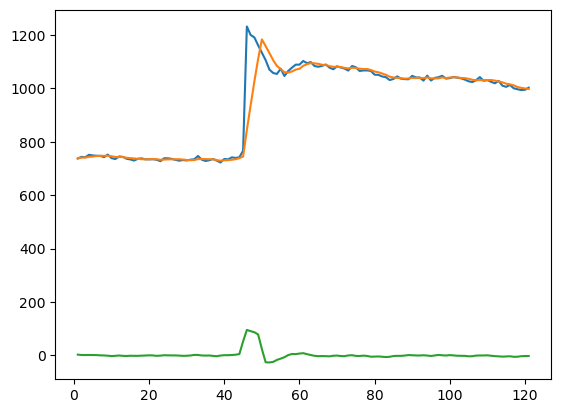

In [102]:
# Plot ID 78624
ID_78624 = df_full[
    df_full["TrackID"] == 78624
]  # Note: since we subtract the original ID with 10**9, here it is 78624 instead of 1000078624
plt.plot(ID_78624["Time"], ID_78624["Intensity Mean"])
plt.plot(ID_78624["Time"], ID_78624["Intensity Smooth"])
plt.plot(ID_78624["Time"], ID_78624["Intensity Derivative"])

In [51]:
print(df_full)

       Intensity Mean Time   TrackID  Intensity Smooth  Intensity Derivative
0          817.684021    1   78592.0        817.684021             24.613983
1          866.911987    2   78592.0        842.298004             23.185659
2          907.570007    3   78592.0        864.055339             19.040123
3          929.346985    4   78592.0        880.378250             11.376829
4          912.531982    5   78592.0        886.808997             12.439268
...               ...  ...       ...               ...                   ...
28640      917.013000   17  145701.0        962.158215             -6.922205
28641      941.820007   18  145701.0        944.866211            -11.614703
28642      956.526001   19  145701.0        938.928809              1.927197
28643      966.359009   20  145701.0        948.720605              2.899500
28644      941.921021   21  145701.0        944.727808             -3.992798

[28554 rows x 5 columns]


#  Part 4.

In [18]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [19]:
NAc=[]#Store Not Activated Trackids
Ac=pd.DataFrame()#Store Activated points

for ID in df_full.TrackID.unique():
    df_track6 = df_full[df_full["TrackID"] == ID]
    df_track6= df_track6.reset_index()
    val=df_track6["Intensity Derivative"].to_numpy()
    peak, _ = find_peaks(val, height=10) #Peak treshold
    if len(peak)==0:
        NAc.append(ID)
    else:
        val=df_track6.loc[peak]
        Ac=Ac.append(val)

In [20]:
print(NAc)

[78596.0, 78612.0, 78614.0, 78626.0, 78628.0, 78635.0, 78646.0, 78659.0, 78664.0, 78677.0, 78688.0, 78690.0, 78699.0, 78707.0, 78709.0, 78712.0, 78719.0, 78721.0, 78722.0, 78725.0, 78732.0, 78744.0, 78747.0, 78750.0, 78759.0, 78762.0, 78781.0, 78789.0, 78794.0, 78812.0, 78823.0, 78829.0, 78836.0, 78838.0, 78840.0, 78844.0, 78845.0, 78862.0, 78868.0, 78876.0, 78877.0, 78881.0, 78897.0, 78900.0, 78906.0, 78912.0, 78913.0, 78928.0, 78940.0, 78943.0, 78948.0, 78954.0, 78960.0, 78962.0, 78966.0, 78968.0, 78988.0, 78996.0, 79007.0, 79021.0, 79026.0, 79032.0, 79072.0, 79083.0, 79090.0, 79091.0, 79092.0, 79104.0, 79119.0, 79126.0, 79127.0, 79130.0, 79132.0, 79139.0, 79163.0, 79168.0, 79172.0, 79180.0, 79188.0, 79203.0, 79206.0, 79213.0, 79233.0, 79239.0, 79245.0, 79249.0, 79256.0, 79267.0, 79270.0, 79284.0, 79292.0, 79309.0, 79320.0, 79321.0, 79326.0, 79368.0, 79376.0, 79402.0, 79611.0, 79683.0, 79885.0, 79996.0, 80052.0, 80138.0, 80445.0, 81298.0, 82205.0, 82416.0, 82887.0, 84669.0, 85308.0, 

In [21]:
IDS=Ac.TrackID.unique()#Activated Trackids
print(IDS)

[ 78592.  78593.  78605.  78624.  78630.  78634.  78669.  78674.  78687.
  78711.  78720.  78737.  78740.  78754.  78757.  78760.  78769.  78772.
  78799.  78814.  78851.  78856.  78869.  78870.  78894.  78907.  78920.
  78929.  78937.  78947.  78963.  78967.  78972.  79011.  79012.  79014.
  79037.  79038.  79040.  79051.  79056.  79059.  79088.  79095.  79097.
  79109.  79118.  79135.  79136.  79145.  79150.  79157.  79159.  79162.
  79167.  79174.  79193.  79200.  79208.  79216.  79246.  79253.  79258.
  79261.  79263.  79269.  79278.  79298.  79302.  79323.  79324.  79410.
  79569.  79781.  79908.  79953.  80306.  82107.  82818.  83256.  83462.
  84004.  84481.  84809.  85601.  86094.  86479.  87932.  88014.  88958.
  89534.  89733.  90067.  90770.  91174.  91301.  91743.  91761.  92499.
  94095.  94457.  94729.  95652.  95807.  97376.  97456.  97759.  98316.
 100268. 103521. 103574. 103904. 103948. 105531. 106151. 106209. 106566.
 106799. 107139. 107166. 108212. 108686. 109404. 10

In [22]:
import random
#list of random trackids
lis=random.sample(list(IDS), 50)#Activated Cells
deac=random.sample(list(NAc), 50)#Deactivated Cell
print(deac)

[78712.0, 79320.0, 79206.0, 79309.0, 79168.0, 145606.0, 78940.0, 79683.0, 78762.0, 78845.0, 110095.0, 137693.0, 78838.0, 123119.0, 123370.0, 105122.0, 124958.0, 106544.0, 125078.0, 80445.0, 135485.0, 91179.0, 78960.0, 135440.0, 137763.0, 142500.0, 142946.0, 79213.0, 117255.0, 78747.0, 78996.0, 78759.0, 85308.0, 78829.0, 79083.0, 93761.0, 78789.0, 79326.0, 79104.0, 94509.0, 78948.0, 78626.0, 125907.0, 79032.0, 79368.0, 78612.0, 78881.0, 79885.0, 78659.0, 79233.0]


In [23]:
IDS.sort()

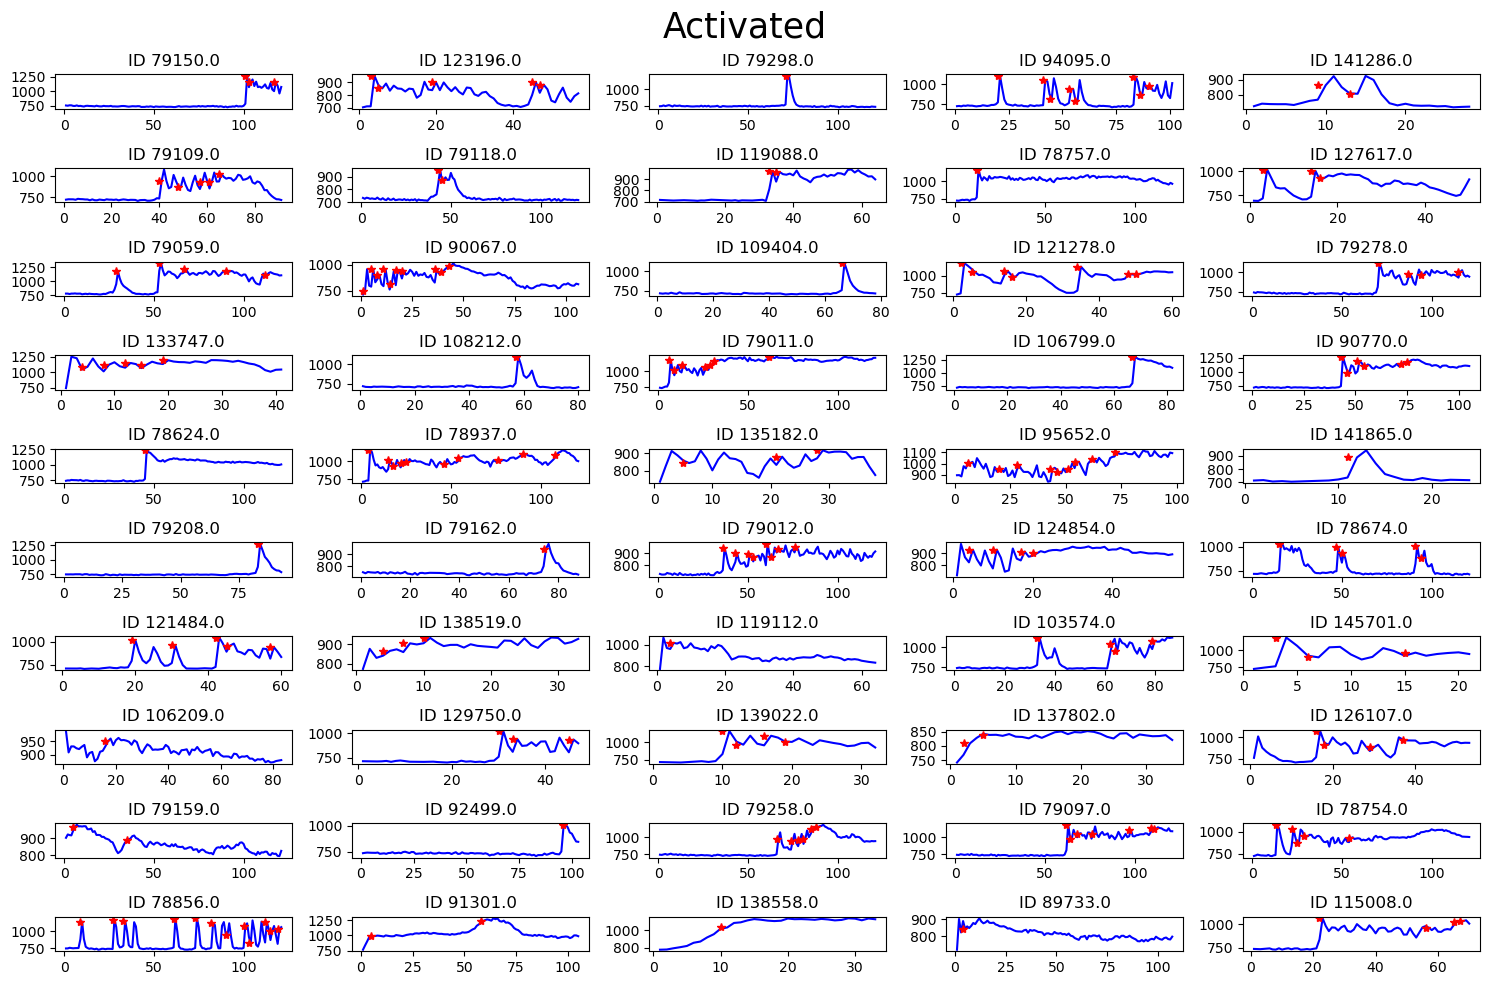

In [105]:

#ACTIVATED

#setup
fig, axs = plt.subplots(10, 5, figsize=(15, 10))
axs = axs.ravel()
plt.suptitle("Activated", fontsize = 25)

for count,ID in enumerate(lis):
    df_track7 = df_full[df_full["TrackID"] == ID]
    df_track7= df_track7.reset_index()
    val=df_track7["Intensity Derivative"].to_numpy()
    #Find Peak
    peak, _ = find_peaks(val, height=10) #Peak treshold
    ax = axs[count]
    ax.set_title(f'ID {ID}')
    ax.plot(df_track7["Time"],df_track7["Intensity Mean"],color="Blue")
    ax.plot(df_track7["Intensity Mean"][peak], "*" , color="Red")

plt.tight_layout()
plt.show()

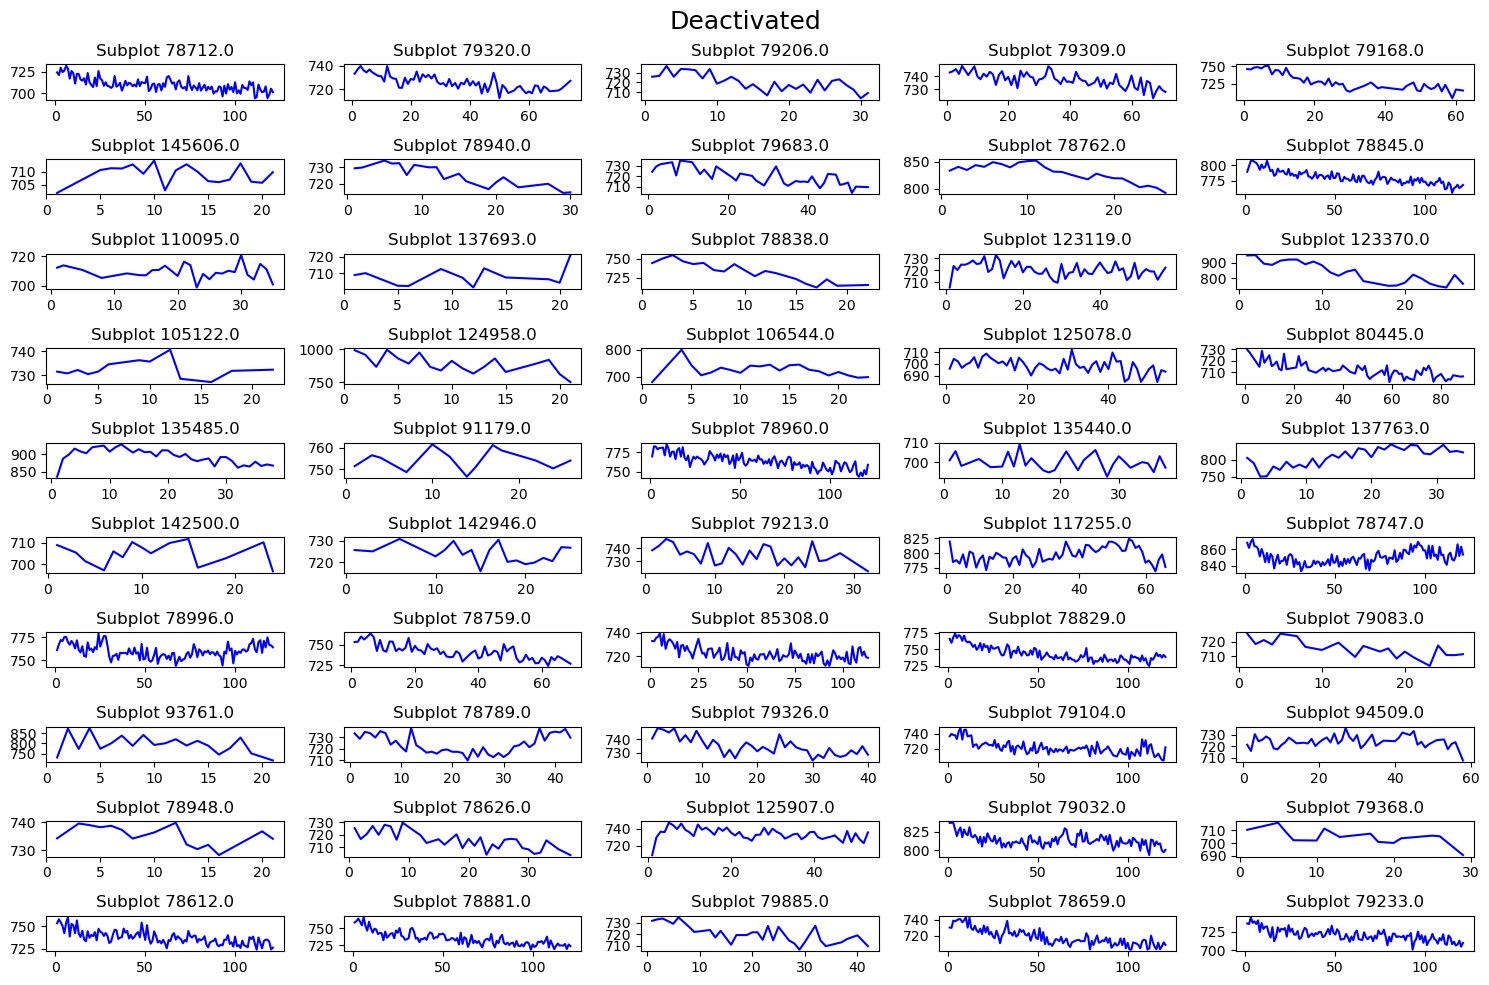

In [122]:
#DEACTIVATED

fig, axs = plt.subplots(10, 5, figsize=(15, 10))
axs = axs.ravel()
plt.suptitle("Deactivated", fontsize = 18)

for count,ID in enumerate(deac):
    df_track7 = df_full[df_full["TrackID"] == ID]
    df_track7= df_track7.reset_index()
    val=df_track7["Intensity Derivative"].to_numpy()
    ax = axs[count]
    ax.set_title(f'Subplot {ID}')
    ax.plot(df_track7["Time"],df_track7["Intensity Mean"],color="Blue")

plt.tight_layout()
plt.show()

In [113]:
#Percentage of Activated Cells
print("Percentage of Activated Cells:",(len(IDS)/len(df_full["TrackID"].unique()))*100)

Percentage of Activated Cells: 51.117318435754186


In [114]:
Activated=df_full[df_full["TrackID"].isin(IDS)]#DataFrame of Activated Trackids
Deactivated=df_full[df_full["TrackID"].isin(NAc)]#DataFrame of Non-Activated Trackids

In [31]:
#13 Resetting Time to 0 for all Trackids
zero_tm=pd.DataFrame()
for trackid in Activated["TrackID"].unique():
    df_track7 = df_full[df_full["TrackID"] == trackid]
    df_track7["Time"]= range(1,len(df_track7)+1)
    zero_tm=zero_tm.append(df_track7)
    

C:\Users\prans\AppData\Local\Temp\ipykernel_20340\2286421194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track7["Time"]= range(1,len(df_track7)+1)
C:\Users\prans\AppData\Local\Temp\ipykernel_20340\2286421194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track7["Time"]= range(1,len(df_track7)+1)
C:\Users\prans\AppData\Local\Temp\ipykernel_20340\2286421194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [52]:
print(zero_tm)

       Intensity Mean  Time   TrackID  Intensity Smooth  Intensity Derivative
0          817.684021     1   78592.0        817.684021             24.613983
1          866.911987     2   78592.0        842.298004             23.185659
2          907.570007     3   78592.0        864.055339             19.040123
3          929.346985     4   78592.0        880.378250             11.376829
4          912.531982     5   78592.0        886.808997             12.439268
...               ...   ...       ...               ...                   ...
28640      917.013000    17  145701.0        962.158215             -6.922205
28641      941.820007    18  145701.0        944.866211            -11.614703
28642      956.526001    19  145701.0        938.928809              1.927197
28643      966.359009    20  145701.0        948.720605              2.899500
28644      941.921021    21  145701.0        944.727808             -3.992798

[15779 rows x 5 columns]


In [53]:
df_ave=pd.DataFrame()
#Average for Time Data across All Activated Cells
for i in Activated["Time"].unique():
    df_track8 = df_full[df_full["Time"] == i]
    new_data = {
        "Intensity Mean": df_track8["Intensity Mean"].mean(),
        "Time": i,
        "Intensity Smooth": df_track8["Intensity Smooth"].mean(),
        "SEM":sem(df_track8["Intensity Mean"])}
    
    df_ave=df_ave.append(new_data, ignore_index=True)
    

In [54]:
print(df_ave)

     Intensity Mean   Time  Intensity Smooth        SEM
0        759.308782    1.0        759.308782   6.047646
1        774.273045    2.0        766.790914   6.530354
2        780.352115    3.0        771.311314   6.600659
3        785.018348    4.0        774.738073   6.881335
4        785.800663    5.0        776.950591   6.765141
..              ...    ...               ...        ...
116      909.878540  117.0        913.474260  19.959524
117      916.055480  118.0        915.540161  20.360103
118      916.756849  119.0        916.783618  20.381378
119      914.020222  120.0        916.722733  20.207534
120      921.470756  121.0        920.266624  21.336198

[121 rows x 4 columns]


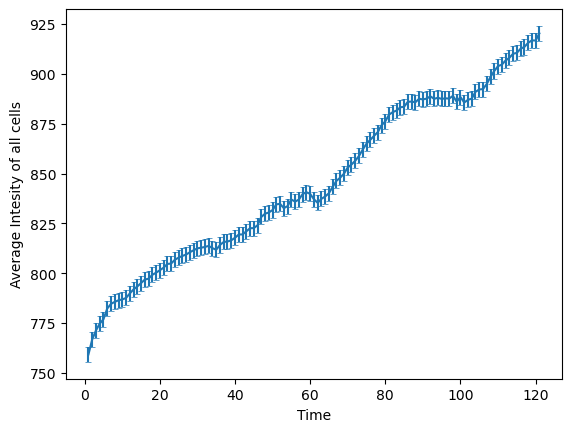

In [138]:
#Plot 15

plt.errorbar(df_ave["Time"],df_ave["Intensity Smooth"],yerr=sem(df_ave["Intensity Mean"]),capsize =2, capthick = 0.5) 
plt.xlabel("Time")
plt.ylabel("Average Intesity of all cells")
plt.show()

In [123]:
#Bonus Part

new_dat=pd.DataFrame()
for ID in Activated["TrackID"].unique():
    df_track9 = Activated[Activated["TrackID"] == ID]
    df_track9= df_track9.reset_index()
    val=df_track9["Intensity Derivative"].to_numpy()
    peak, _ = find_peaks(val, height=10)
    dat=df_track9[df_track9["Time"]>=peak[0]]
    new_dat =new_dat.append(dat) 
    


In [124]:
print(new_dat)

    index  Intensity Mean Time   TrackID  Intensity Smooth  \
4       4      912.531982    5   78592.0        886.808997   
5       5      909.922974    6   78592.0        905.256787   
6       6      923.859009    7   78592.0        916.646191   
7       7      909.299988    8   78592.0        916.992188   
8       8      905.577026    9   78592.0        912.238196   
..    ...             ...  ...       ...               ...   
16  28640      917.013000   17  145701.0        962.158215   
17  28641      941.820007   18  145701.0        944.866211   
18  28642      956.526001   19  145701.0        938.928809   
19  28643      966.359009   20  145701.0        948.720605   
20  28644      941.921021   21  145701.0        944.727808   

    Intensity Derivative  
4              12.439268  
5              14.918597  
6               5.867700  
7              -2.203998  
8              -4.278296  
..                   ...  
16             -6.922205  
17            -11.614703  
18          

In [125]:
for i in new_dat["Time"].unique():
    #print(i)
    df_track10 = new_dat[new_data["Time"] == i]
    new_d = {
        "Intensity Mean": df_track10["Intensity Mean"].mean(),
        "Time": i,
        "Intensity Smooth": df_track10["Intensity Smooth"].mean(),
        "SEM":sem(df_track10["Intensity Mean"])}
    
    df_times=df_times.append(new_d, ignore_index=True)

In [126]:
df_times=df_times.sort_values('Time')

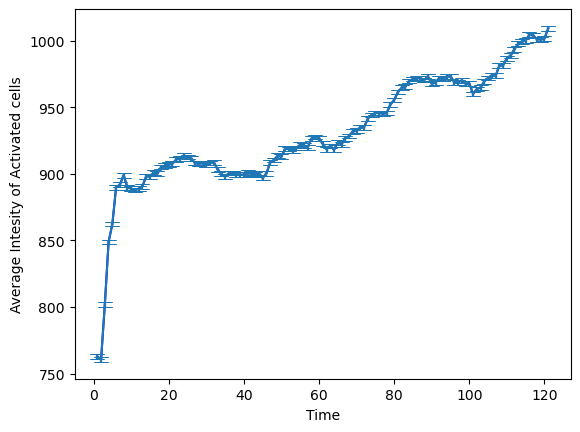

In [135]:
plt.plot(df_times["Time"],df_times["Intensity Smooth"],color="Blue")
plt.errorbar(df_times["Time"],df_times["Intensity Smooth"],yerr=sem(df_times["Intensity Mean"]),capsize =5, capthick = 0.5) 
plt.xlabel("Time")
plt.ylabel("Average Intesity of Activated cells")
plt.show()